In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv


In [2]:
import pandas as pd
df=pd.read_csv("../input/youtube-new/USvideos.csv")
df.head()
print(df.nunique())
df.info()
df.shape

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949

(40949, 16)

0.7074653837700554
0.729785831155828
0.8810227355979389
0.7225817480280349


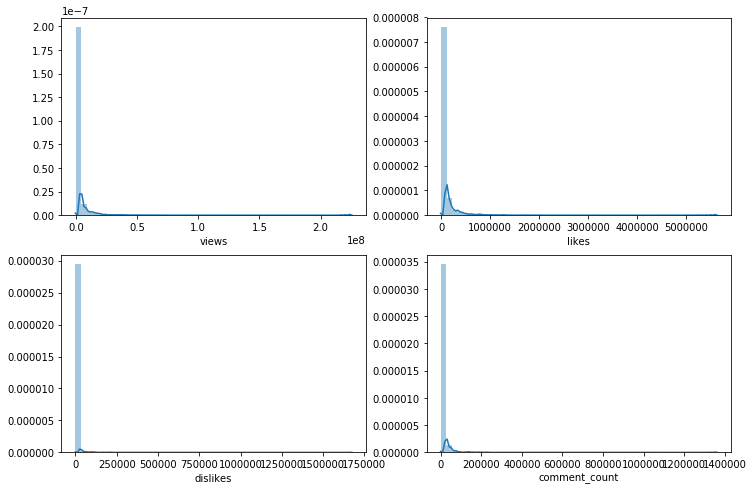

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,8))
plt.subplot(221)
p1=sns.distplot(df['views'])
#most of the trending videos have 5 million views or less
print(df[df['views']<1.5e6]['views'].count()/df['views'].count())
#70% of videos are under 1.5 million views
plt.subplot(222)
p2=sns.distplot(df['likes'])
#around 72% of the videos have less than 50000 likes
print(df[df['likes']<50000]['likes'].count()/df['likes'].count())
plt.subplot(223)
#around 88% of the videos have less than 5000 dislikes
p3=sns.distplot(df['dislikes'])
print(df[df['dislikes']<5000]['dislikes'].count()/df['dislikes'].count())
plt.subplot(224)
#around 72% of the videos have less than 5000 comments
p4=sns.distplot(df['comment_count'])
print(df[df['comment_count']<5000]['comment_count'].count()/df['comment_count'].count())
#We can see that they are not normally distributed
plt.show()

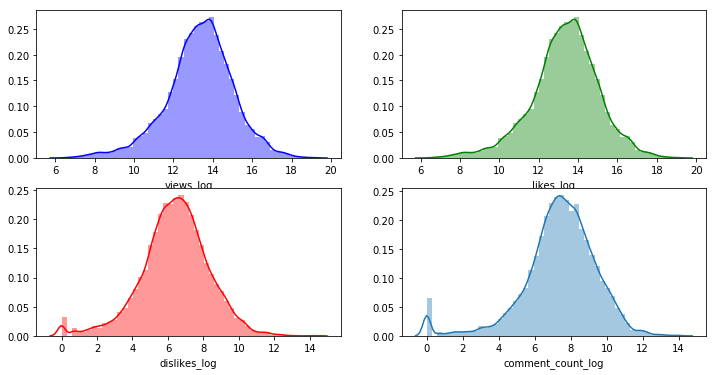

In [4]:
#To make them normally distributed
import numpy as np
df['views_log']=np.log(df['views']+1)
df['likes_log']=np.log(df['views']+1)
df['dislikes_log']=np.log(df['dislikes']+1)
df['comment_count_log']=np.log(df['comment_count']+1)
plt.figure(figsize=(12,6))
plt.subplot(221)
q1=sns.distplot(df['views_log'],color='blue')
plt.subplot(222)
q2=sns.distplot(df['likes_log'],color='green')
plt.subplot(223)
q3=sns.distplot(df['dislikes_log'],color='r')
plt.subplot(224)
q4=sns.distplot(df['comment_count_log'])
plt.show()
#Yayyy everything is normally distrubuted

In [5]:
#Now lets see the quantiles
print("Views Quantiles")
print(df['views'].quantile([.01,0.25,0.5,0.75,0.99]))
print(df['views_log'].quantile([.01,0.25,0.5,0.75,0.99]))
print(df['likes'].quantile([.01,0.25,0.5,0.75,0.99]))
print(df['likes_log'].quantile([.01,0.25,0.5,0.75,0.99]))
print(df['dislikes'].quantile([.01,0.25,0.5,0.75,0.99]))
print(df['dislikes_log'].quantile([.01,0.25,0.5,0.75,0.99]))
print(df['comment_count'].quantile([.01,0.25,0.5,0.75,0.99]))
print(df['comment_count_log'].quantile([.01,0.25,0.5,0.75,0.99]))
#everything is changed to one scale 

Views Quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64
0.01     8.345417
0.25    12.398056
0.50    13.432583
0.75    14.416081
0.99    17.213949
Name: views_log, dtype: float64
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64
0.01     8.345417
0.25    12.398056
0.50    13.432583
0.75    14.416081
0.99    17.213949
Name: likes_log, dtype: float64
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64
0.01     0.693147
0.25     5.313206
0.50     6.448889
0.75     7.569928
0.99    10.681968
Name: dislikes_log, dtype: float64
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64
0.01     0.000000
0.25     6.421622
0.50     7.526718
0.75     8.657998
0.99    11.518952
Name: comment_count_log, dtype: float64


In [6]:
#creating a new category with category name which implies with category id
df['categoryname']=np.nan
df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,views_log,likes_log,dislikes_log,comment_count_log,categoryname,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,13.525659,13.525659,7.995307,9.677528,NaN,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",14.698775,14.698775,8.723719,9.449672,NaN,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14.975981,14.975981,8.582981,9.009692,NaN,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,12.745978,12.745978,6.502790,7.671827,NaN,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,14.555413,14.555413,7.595890,9.771041,NaN,Entertainment


Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News & Politics             2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Non Profits and Activism      57
Name: category_name, dtype: int64


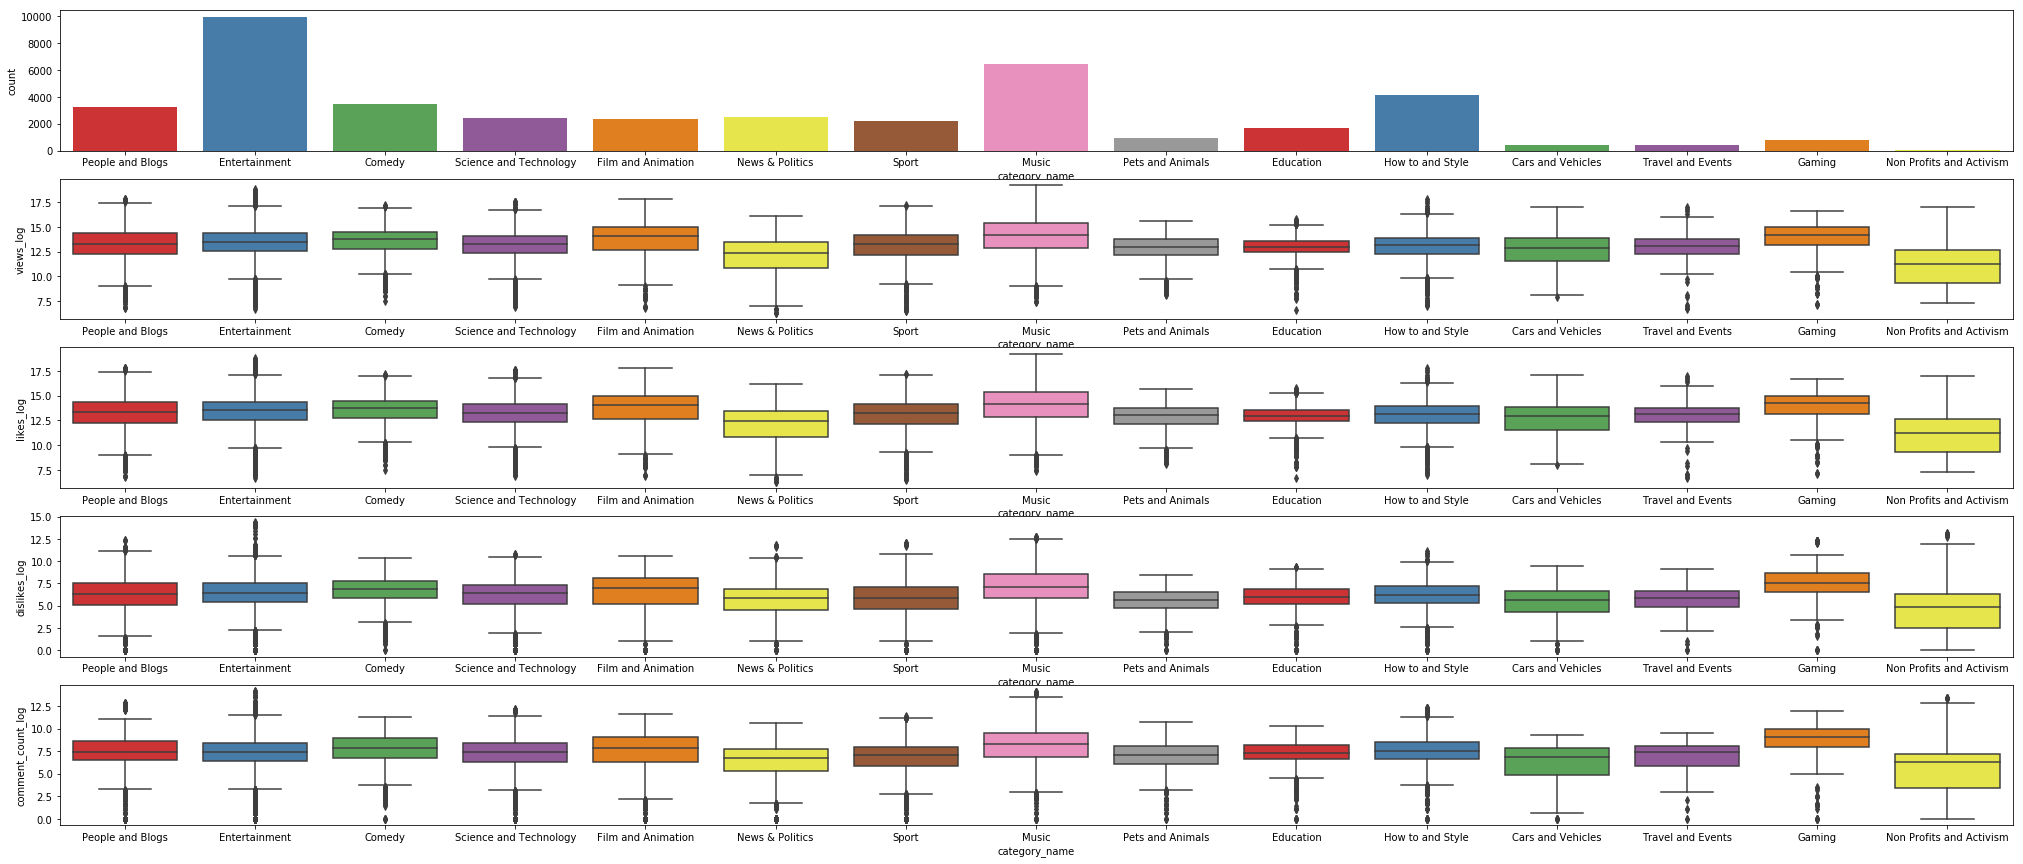

In [7]:
#box plots for transformed variables
print(df.category_name.value_counts())
plt.figure(figsize=(35,15))
plt.subplot(511)
g1=sns.countplot(df['category_name'],palette="Set1")
plt.subplot(512)
g2= sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
plt.subplot(513)
g3=sns.boxplot(x='category_name',y='likes_log',data=df,palette="Set1")
plt.subplot(514)
g4=sns.boxplot(x='category_name',y='dislikes_log',data=df,palette="Set1")
plt.subplot(515)
g5=sns.boxplot(x='category_name',y='comment_count_log',data=df,palette="Set1")
plt.show()

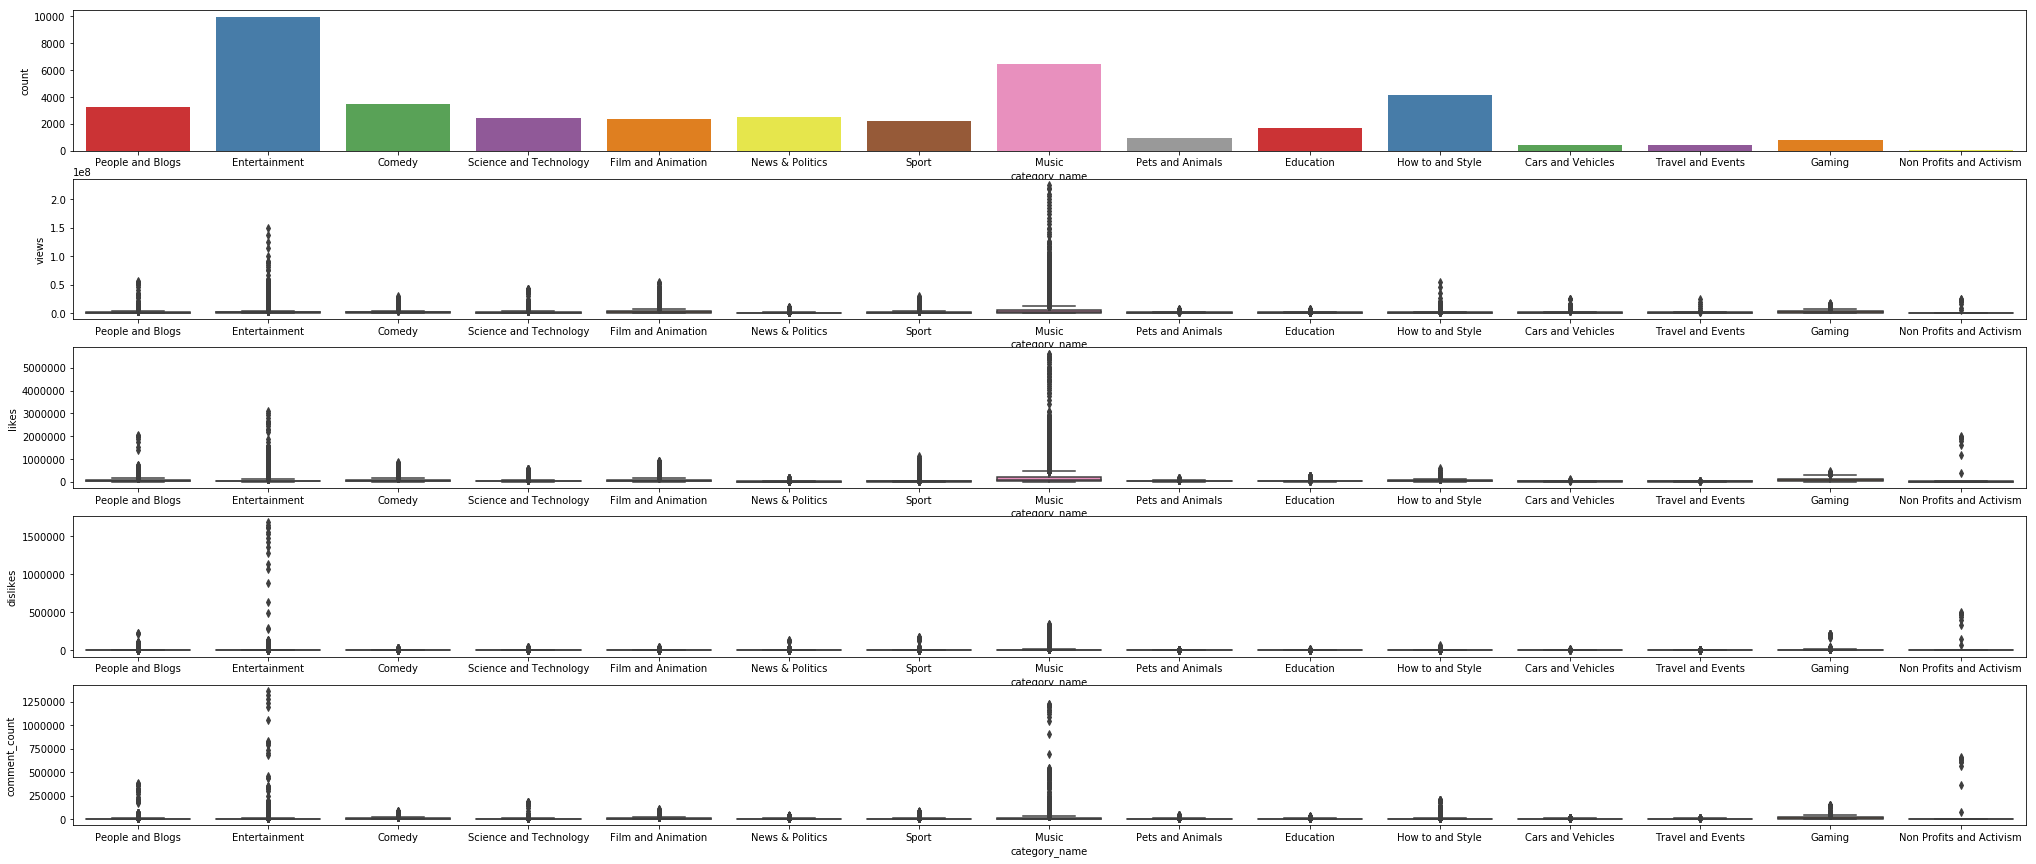

In [8]:
#without transforming boxplots
plt.figure(figsize=(35,15))
plt.subplot(511)
g1=sns.countplot(df['category_name'],palette="Set1")
plt.subplot(512)
g2= sns.boxplot(x='category_name', y='views', data=df, palette="Set1")
plt.subplot(513)
g3=sns.boxplot(x='category_name',y='likes',data=df,palette="Set1")
plt.subplot(514)
g4=sns.boxplot(x='category_name',y='dislikes',data=df,palette="Set1")
plt.subplot(515)
g5=sns.boxplot(x='category_name',y='comment_count',data=df,palette="Set1")
plt.show()

In [9]:
df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] = df['dislikes'] / df['views'] * 100
df['comment_rate'] = df['comment_count'] / df['views'] * 100

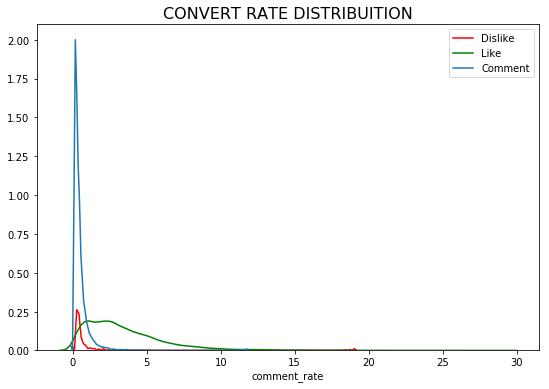

In [10]:
plt.figure(figsize = (9,6))
g1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
g2 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")
g3= sns.distplot(df['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.show()

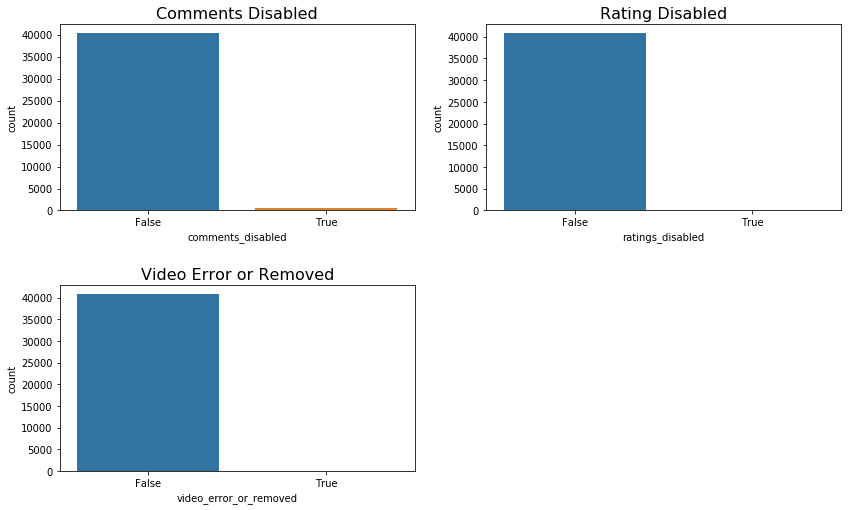

In [11]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

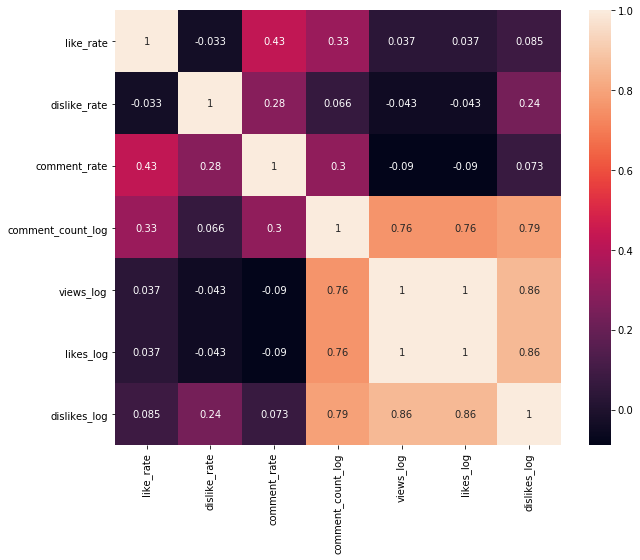

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,views_log,likes_log,dislikes_log,comment_count_log,categoryname,like_rate,dislike_rate,comment_rate
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,-0.172070,-0.172070,-0.105567,-0.107575,NaN,-0.051164,0.050919,0.080174
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,0.494099,0.494099,0.431819,0.362787,NaN,-0.034927,-0.003572,-0.048708
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,0.466928,0.466928,0.438127,0.434318,NaN,0.180907,0.008335,0.070496
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,0.206148,0.206148,0.263181,0.199166,NaN,-0.000858,0.263008,0.089142
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,0.319630,0.319630,0.338751,0.357253,NaN,0.131161,0.126086,0.247241
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,-0.021518,-0.021518,-0.071231,-0.450011,NaN,-0.100684,0.039608,-0.097271
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,-0.021254,-0.021254,-0.214666,-0.165460,NaN,-0.082025,-0.027648,-0.029261
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000,-0.002007,-0.002007,-0.000226,-0.013419,NaN,-0.003108,-0.000345,-0.001944
views_log,-0.172070,0.494099,0.466928,0.206148,0.319630,-0.021518,-0.021254,-0.002007,1.000000,1.000000,0.857959,0.760665,NaN,0.037237,-0.042921,-0.089616
likes_log,-0.172070,0.494099,0.466928,0.206148,0.319630,-0.021518,-0.021254,-0.002007,1.000000,1.000000,0.857959,0.760665,NaN,0.037237,-0.042921,-0.089616


In [12]:
plt.figure(figsize = (10,8))
#Let's verify the correlation of each value
sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate','comment_count_log','views_log','likes_log','dislikes_log', "category_name"]].corr(),annot=True)
plt.show()
df.corr()

   year  No_of_videos
0  2018         31349
1  2017          9600


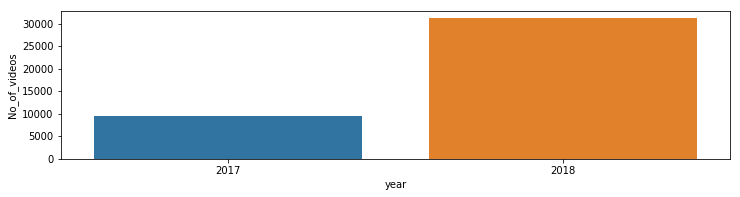

2018    0.765562
2017    0.234438
Name: trending_date, dtype: float64

In [13]:
cdf= df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})
print(cdf)
# This extracts the value counts and resets the indexes
plt.figure(figsize=(12,6))
plt.subplot(211)
k=sns.barplot(x=cdf["year"],y=cdf["No_of_videos"])
plt.show()
#more than 2/3rd videos are released in 2018
df["trending_date"].apply(lambda x:'20'+x[:2]).value_counts(normalize=True)

In [14]:
#to find the description of non integer columns
df.describe(include = ['O'])
#There are 205 unique dates when the video is released
#There are 6351 videos which appeared in trending multiple times which are 2207 different channels

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category_name
count,40949,40949,40949,40949,40949,40949,40949,40379,40892
unique,6351,205,6455,2207,6269,6055,6352,6901,15
top,j4KvrAUjn6c,18.27.04,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...,Entertainment
freq,30,200,30,203,50,1535,30,58,9964


In [15]:
grouped=df.groupby(['video_id'])
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,views_log,likes_log,dislikes_log,comment_count_log,categoryname,category_name,like_rate,dislike_rate,comment_rate
14266,0ufNmUyf2co,18.26.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,...,Some of the questions I get most are about my ...,12.118061,12.118061,4.234107,6.715383,NaN,How to and Style,3.805099,0.037128,0.449907
14491,0ufNmUyf2co,18.27.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,...,Some of the questions I get most are about my ...,12.225483,12.225483,4.290459,6.616065,NaN,How to and Style,3.608295,0.035308,0.365832
14706,0ufNmUyf2co,18.28.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,...,Some of the questions I get most are about my ...,12.285106,12.285106,4.317488,6.633318,NaN,How to and Style,3.514948,0.034189,0.350663
14931,0ufNmUyf2co,18.29.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,...,Some of the questions I get most are about my ...,12.332732,12.332732,4.369448,6.633318,NaN,How to and Style,3.415784,0.034360,0.334354
15175,0ufNmUyf2co,18.30.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,...,Some of the questions I get most are about my ...,12.360865,12.360865,4.369448,6.646391,NaN,How to and Style,3.363000,0.033407,0.329362
15385,0ufNmUyf2co,18.31.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,...,Some of the questions I get most are about my ...,12.382058,12.382058,4.406719,6.658011,NaN,How to and Style,3.310089,0.033965,0.326229


In [16]:
#Counting number of words in each title and tag
df['count_word']=df['title'].apply(lambda x: len(str(x).split()))
df['count_word_tag']=df['tags'].apply(lambda x: len(str(x).split()))
#Counting number of unique words in each title and tag
df['count_word_unique']=df['title'].apply(lambda x: len(set(str(x).split())))
df['count_word_tag_unique']=df['tags'].apply(lambda x: len(set(str(x).split())))
##Counting number of letters in each title and tag
df['count_letters']=df['title'].apply(lambda x:len(str(x)))
df['count_letters_tags']=df['tags'].apply(lambda x:len(str(x)))
#Counting number of punctuation
import string
df['count_punctuation']=df['title'].apply(lambda x:len([c for c in str(x) if c in string.punctuation]))
df['count_punctuation_tags']=df['tags'].apply(lambda x:len([c for c in str(x) if c in string.punctuation]))
#Counting capital letters
df['count_capitals']=df['title'].apply(lambda x:len([c for c in str(x).split() if c.isupper()]))
df['count_capitals_tags']=df['tags'].apply(lambda x:len([c for c in str(x).split() if c.isupper()]))
#Counting stop words
import nltk
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
df['count_stopwords']=df['title'].apply(lambda x:len([c for c in str(x).lower().split() if c in eng_stopwords]))
df['count_stopwords_tag']=df['tags'].apply(lambda x:len([c for c in str(x).lower().split() if c in eng_stopwords]))
#Counting average length of words
df['mean_word_len']=df['title'].apply(lambda x:np.mean([len(w) for w in str(x).split()]))
df['mean_word_len_tag']=df['tags'].apply(lambda x:np.mean([len(w) for w in str(x).split()]))

In [17]:
#unique word percentage
df['unique_word_per']=(df['count_word_unique']/df['count_word'])*100
df['unique_word_per_tag']=(df['count_word_tag_unique']/df['count_word_tag'])*100
#Punct percent in each comment:
df_yout['punct_percent']=df_yout['count_punctuations']*100/df_yout['count_word']
df_yout['punct_percent_tags']=df_yout['count_punctuations_tags']*100/df_yout['count_word_tags']


NameError: name 'df_yout' is not defined

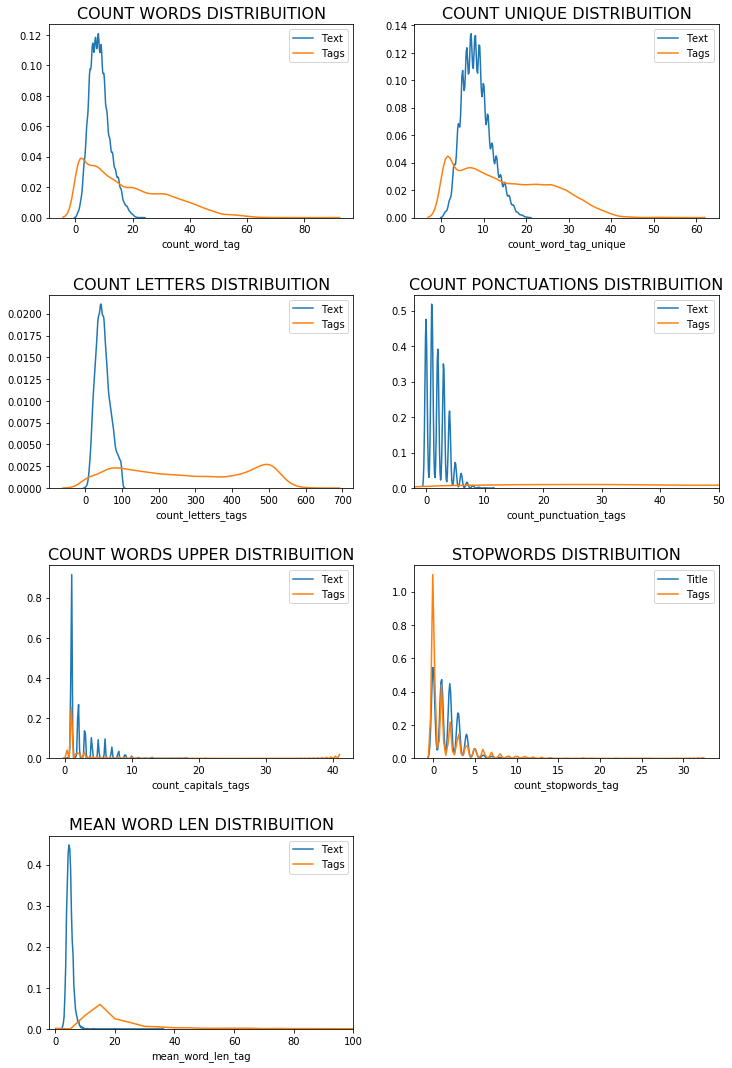

In [18]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df['count_word'],hist=False, label='Text')
g1 = sns.distplot(df['count_word_tag'],hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)
plt.subplot(422)
g2 = sns.distplot(df['count_word_unique'],hist=False, label='Text')
g2 = sns.distplot(df['count_word_tag_unique'],hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)
plt.subplot(423)
g3 = sns.distplot(df['count_letters'], hist=False, label='Text')
g3 = sns.distplot(df['count_letters_tags'], hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)
plt.subplot(424)
g4 = sns.distplot(df["count_punctuation"], hist=False, label='Text')
g4 = sns.distplot(df["count_punctuation_tags"],hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)
plt.subplot(425)
g5 = sns.distplot(df["count_capitals"] , hist=False, label='Text')
g5 = sns.distplot(df["count_capitals_tags"] ,  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)
plt.subplot(426)
g7 = sns.distplot(df["count_stopwords"], hist=False, label='Title')
g7 = sns.distplot(df["count_stopwords_tag"], hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g8 = sns.distplot(df["mean_word_len"], hist=False, label='Text')
g8 = sns.distplot(df["mean_word_len_tag"],hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

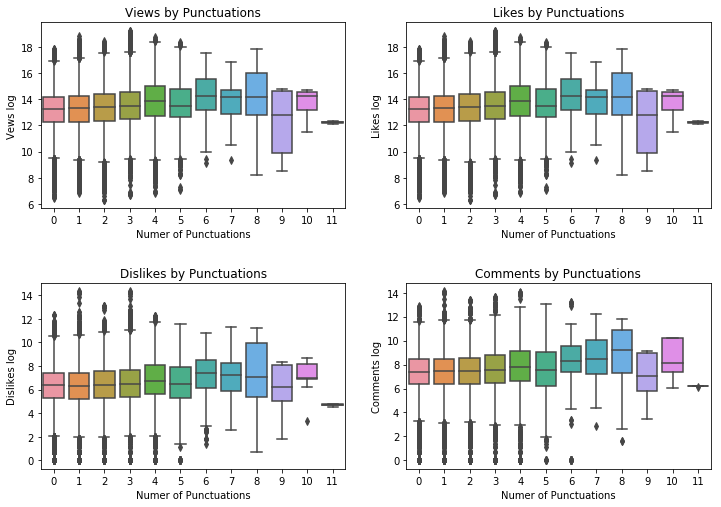

In [19]:
plt.figure(figsize = (12,8))
plt.subplot(221)
g=sns.boxplot(x='count_punctuation', y='views_log',data=df)
g.set_title("Views by Punctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")
plt.subplot(222)
g1 = sns.boxplot(x='count_punctuation', y='likes_log',data=df)
g1.set_title("Likes by Punctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")
plt.subplot(223)
g2 = sns.boxplot(x='count_punctuation', y='dislikes_log',data=df)
g2.set_title("Dislikes by Punctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")
plt.subplot(224)
g3 = sns.boxplot(x='count_punctuation', y='comment_count_log',data=df)
g3.set_title("Comments by Punctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.show()

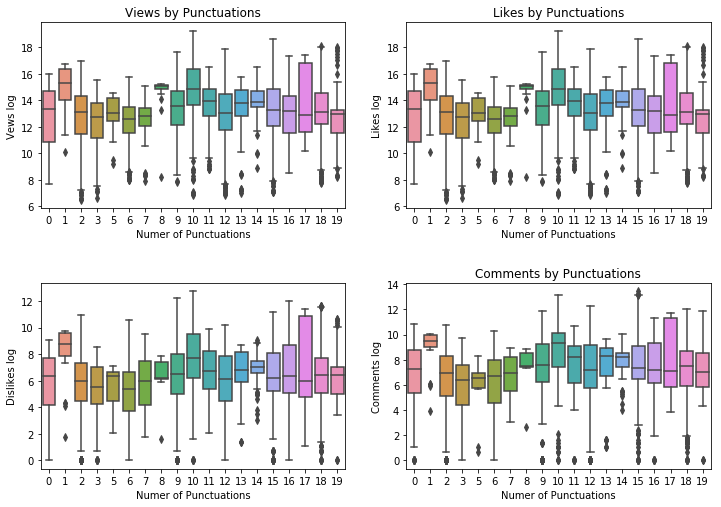

In [20]:
plt.figure(figsize = (12,8))
plt.subplot(221)
g=sns.boxplot(x='count_punctuation_tags', y='views_log',data=df[df['count_punctuation_tags']<20])
g.set_title("Views by Punctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")
plt.subplot(222)
g1 = sns.boxplot(x='count_punctuation_tags', y='likes_log',data=df[df['count_punctuation_tags']<20])
g1.set_title("Likes by Punctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")
plt.subplot(223)
g2 = sns.boxplot(x='count_punctuation_tags', y='dislikes_log',data=df[df['count_punctuation_tags']<20])
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")
plt.subplot(224)
g3 = sns.boxplot(x='count_punctuation_tags', y='comment_count_log',data=df[df['count_punctuation_tags']<20])
g3.set_title("Comments by Punctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.show()

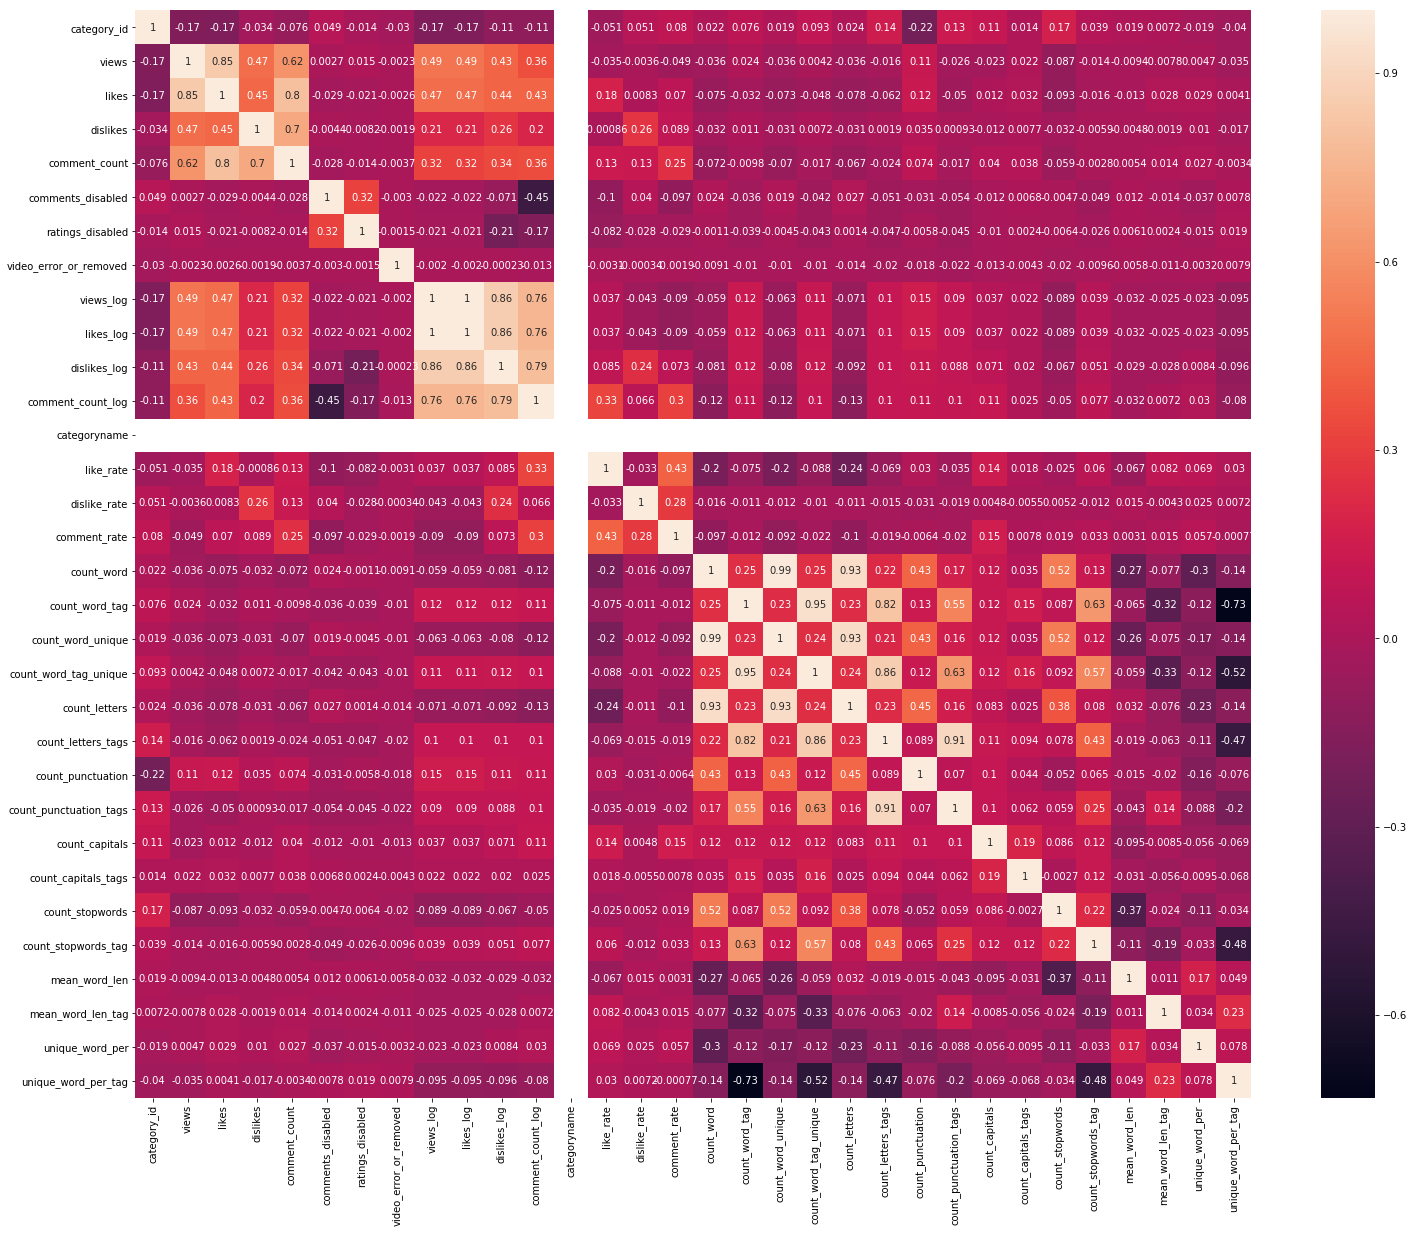

In [21]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

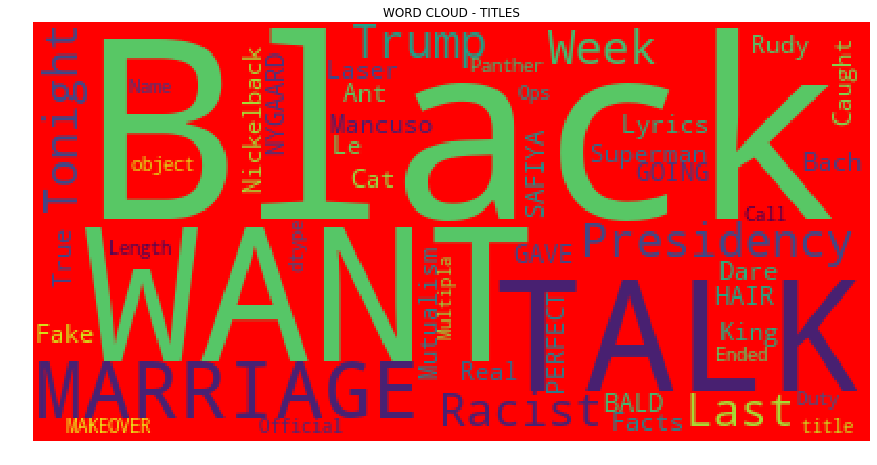

In [22]:
#printing wordcloud for title
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
stopwords=set(STOPWORDS)
wordcloud=WordCloud(background_color='Red',stopwords=stopwords,max_words=1000,max_font_size=120,random_state=42).generate(str(df['title']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

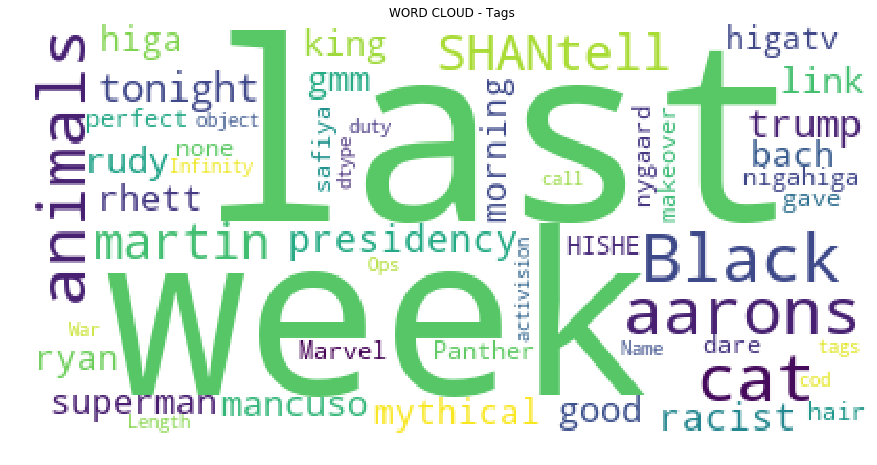

In [23]:
#printing wordcloud for tags
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
stopwords=set(STOPWORDS)
wordcloud=WordCloud(background_color='White',stopwords=stopwords,max_words=1000,max_font_size=120,random_state=42).generate(str(df['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Tags")
plt.axis('off')
plt.show()

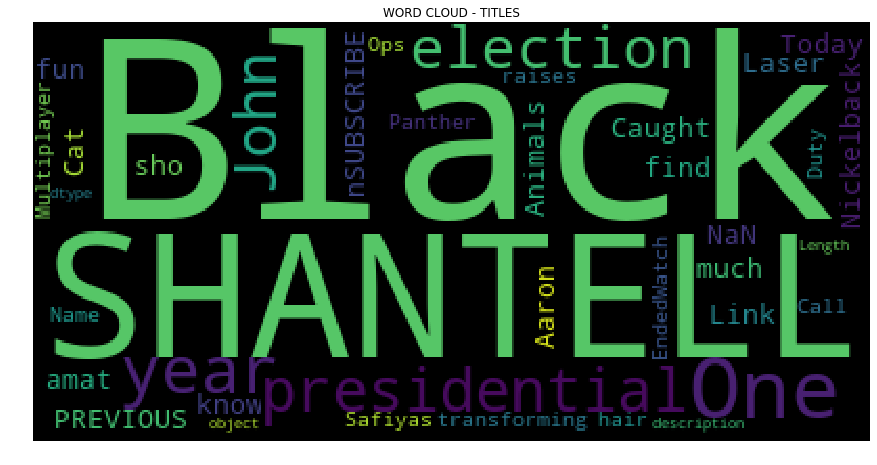

In [24]:
#printing wordcloud for title
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
stopwords=set(STOPWORDS)
newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']
stopwords.update(newStopWords)
wordcloud=WordCloud(background_color='Black',stopwords=stopwords,max_words=1000,max_font_size=120,random_state=42).generate(str(df['description']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

Category Name count
5     6681
2     6207
12    6182
3     6175
1     5502
Name: month, dtype: int64


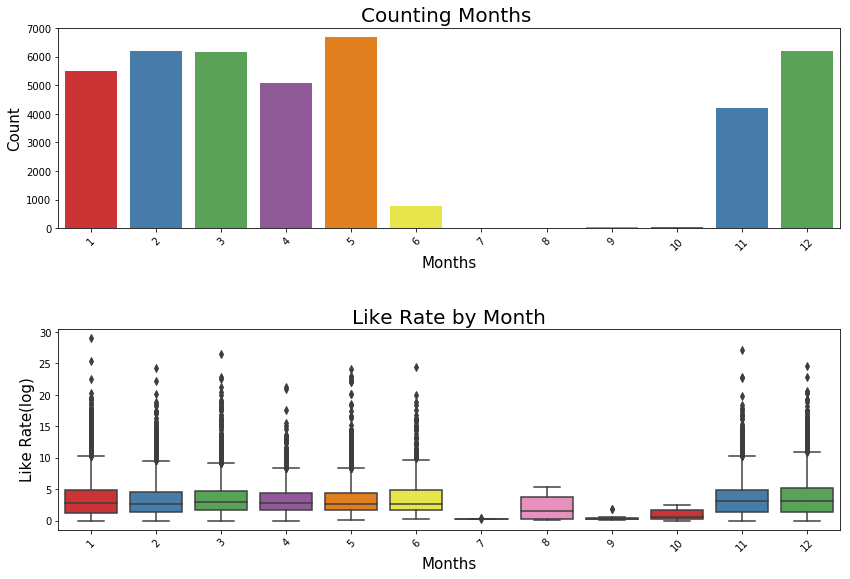

In [25]:
df['publish_time']=pd.to_datetime(df['publish_time'],format='%Y-%m-%dT%H:%M:%S.%fZ')
df['month'] = df['publish_time'].dt.month

print("Category Name count")
print(df['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.boxplot(x='month', y='like_rate', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [26]:
import datetime
#Publishing day
df["publishing_day"] = df["publish_time"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
#publishing hour
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)
      

TypeError: 'Timestamp' object is not subscriptable

In [27]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
g1= sns.barplot(x="publishing_day", y="No_of_videos", data=cdf)
plt.show()

KeyError: 'publishing_day'

In [28]:

cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
k1=sns.barplot(x="publishing_hour",y="No_of_videos",data=cdf)
plt.show()

KeyError: 'publishing_hour'

ValueError: too many values to unpack (expected 2)

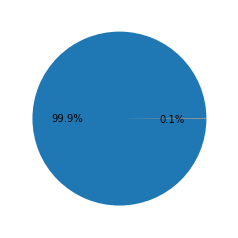

In [29]:
sizes=df["video_error_or_removed"].value_counts()
patches, texts = plt.pie(sizes,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()